### Investigation Overview

Investigation of the Ford GoBike System, We canmost common customer behaviors and characteristics, and how user type, time, gender, and age impacts usage of the system.

Bikes are available all time in year for use 24 hours, 7 days in week, 365 days per year and riders have access to all bikes in the network

questions:

- Types of customers?
- Montly usage of bikes by riders?
- Number of User Types by weekends? 
- How long average trip take?
- Count of bikes user is a subscriber or customer per hours?


In [2]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import seaborn as sns


In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv',encoding='ISO-8859-1')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177630 entries, 0 to 177629
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             177630 non-null  int64  
 1   start_time               177630 non-null  object 
 2   end_time                 177630 non-null  object 
 3   start_station_id         177630 non-null  int64  
 4   start_station_name       177630 non-null  object 
 5   start_station_latitude   177630 non-null  float64
 6   start_station_longitude  177630 non-null  float64
 7   end_station_id           177630 non-null  int64  
 8   end_station_name         177630 non-null  object 
 9   end_station_latitude     177630 non-null  float64
 10  end_station_longitude    177630 non-null  float64
 11  bike_id                  177630 non-null  int64  
 12  user_type                177630 non-null  object 
 13  member_birth_year        177630 non-null  int64  
 14  memb

In [49]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,end_time_in_month,start_time_week,end_time_week,month,start_hour,end_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,False,38,3,Thu,Fri,March,17,8,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,NaN,False,34,3,Thu,Fri,March,18,6,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,False,50,3,Thu,Fri,March,12,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,False,33,3,Thu,Fri,March,17,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,True,48,3,Thu,Fri,March,23,0,26.416667


We have 24 columns and 177629 rows gobikedata

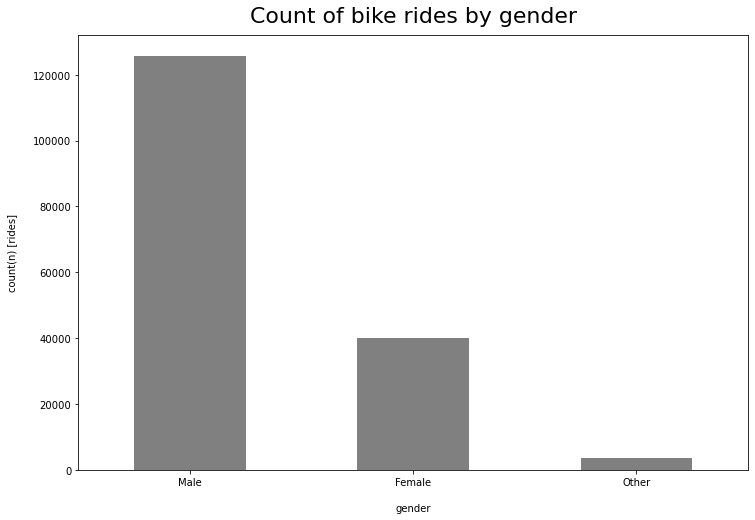

In [55]:
df['member_gender'].value_counts().plot.bar(color=['gray'],figsize=(12,8), legend=False)
plt.title('Count of bike rides by gender', fontsize=22, y=1.015)
plt.xlabel('gender', labelpad=16)
plt.ylabel('count(n) [rides]', labelpad=16)
plt.xticks(rotation=360);

Males are more that female bike riders

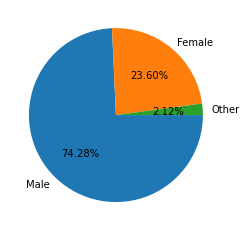

In [56]:
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,
        counterclock = False, autopct='%1.2f%%');

We have 74.28% of Male , 23.60% Female and we have 2.12% unknown 

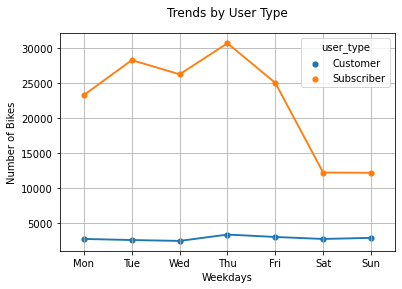

In [62]:
df_week = df.groupby(['start_time_week', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_week, x='start_time_week', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trends by User Type', y=1.05, fontsize=12)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bikes');
plt.grid()

Customers have a low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, and low on weekend.

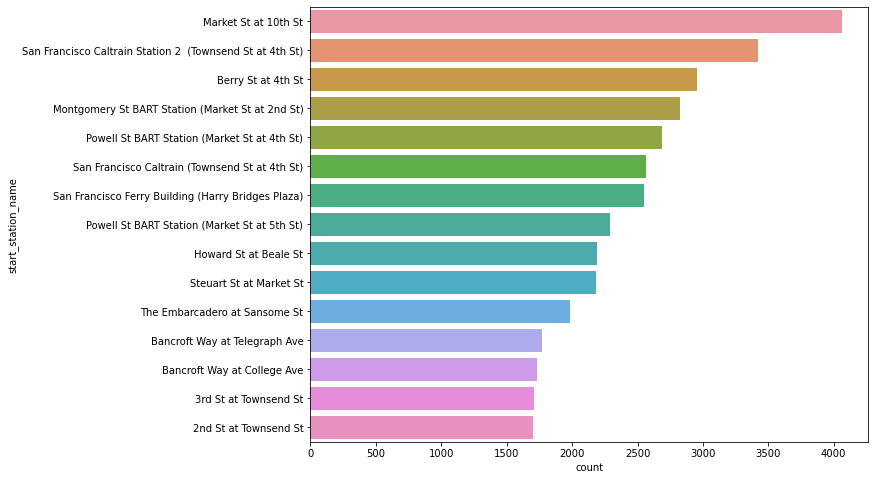

In [7]:
# plot a horizontal bar chart
cat_order = df['start_station_name'].value_counts().index[:15]
plt.figure(figsize=[10,8])
sns.countplot(data = df, y = 'start_station_name', order = cat_order);

Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) were the most common start stations.

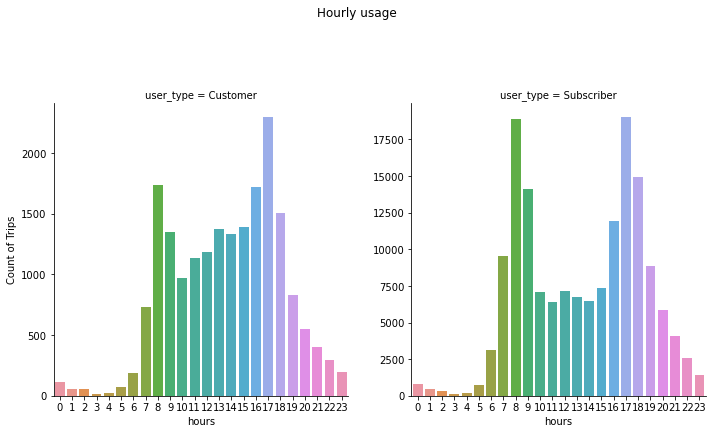

In [60]:
plot = sb.catplot(data=df, x='start_hour', col="user_type", kind='count', sharey = False)
plot.set_axis_labels("hours", "Count of Trips")
plot.fig.suptitle('Hourly usage', y=1.20, fontsize=12);

Most usage during the morning hours of 8-9am, and in the evening hours of 5-6pm

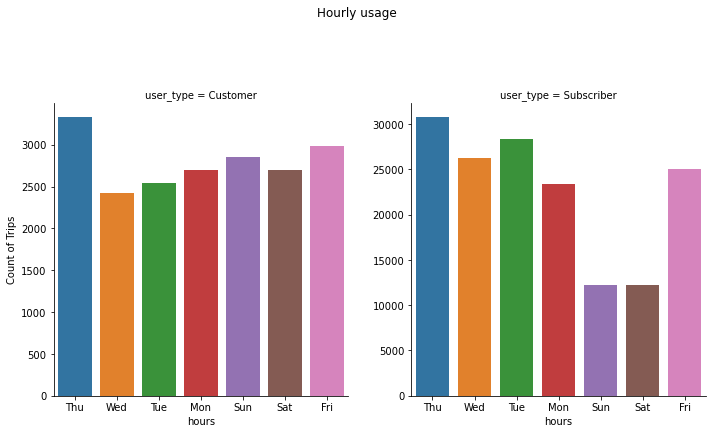

In [61]:
# Analysis of the number of trips taken by different user types across a hour of the day
plot = sb.catplot(data=df, x='start_time_week', col="user_type", kind='count', sharey = False)
plot.set_axis_labels("hours", "Count of Trips")
plot.fig.suptitle('Hourly usage', y=1.20, fontsize=12);

*****Subscribers members mostly used bikes on workdays and customers bikes usage was almost the whole week with a slight increment on Thuseday and Friday.